In [7]:
import fuel.converters.adult as cv
cv.convert_adult('/home/rob/Downloads/adult/Source','/home/rob/Datasets/')

('/home/rob/Datasets/adult.hdf5',)

In [10]:
import subprocess
subprocess.call(['export','FUEL_DATA_PATH=/home/rob/Datasets'],shell=True)
from sklearn.linear_model import Ridge
from sklearn import datasets
from fuel.datasets.adult import Adult
adult=Adult(['train',])


In [24]:
from fuel.datasets import H5PYDataset
train_set = H5PYDataset('/home/rob/Datasets/adult.hdf5',which_sets=('train',))
X=train_set.get_data()
print(train_set.num_examples)
test_set = H5PYDataset('/home/rob/Datasets/adult.hdf5',which_sets=('test',))
print(test_set.num_examples)

ValueError: 

In [22]:
print(train_set.shape)
print(test_set.provides_sources)

AttributeError: 'H5PYDataset' object has no attribute 'shape'

Automatically created module for IPython interactive environment
len of uniques:  1


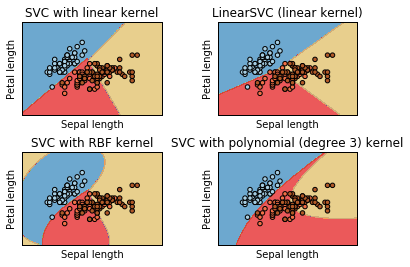

In [1]:
print(__doc__)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
leuk = datasets.load_iris()
X = leuk.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = leuk.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Petal length')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [ ]:
print(y)